# **Guided Project: Storytelling Data Visualization on Exchange Rates**

**Sobre o Dataset**

Neste projeto iremos utilizar um dataset que descreve as taxas de câmbio diárias para o Euro entre 1999 e 2021. O Euro (simbolizado por €) é a moeda oficial na maior parte dos países da União Europeia.

O dataset está disponível no [Kaggle](https://www.kaggle.com/lsind18/euro-exchange-daily-rates-19992020), sendo a fonte dos dados o Banco Central Europeu. O arquivo passa por constantes atualizações. Para este projeto, o download do referido dataset foi realizado em agosto de 2021.

**Sobre a Taxa de Câmbio**

Para exemplificar, imagine que a taxa de câmbio do Euro em relação ao Dólar americano está em 1.5. Isto significa que com 1.5 dólar é possível adquirir 1 euro.

## **Lendo o arquivo CSV**

In [ ]:
import pandas as pd

exchange_rates = pd.read_csv('/content/drive/MyDrive/DataQuest/Passo 2: Data Analysis and Visualization/euro-daily-hist_1999_2020.csv')
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5781 entries, 0 to 5780
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              5781 non-null   object 
 1   [Australian dollar ]      5781 non-null   object 
 2   [Bulgarian lev ]          5379 non-null   object 
 3   [Brazilian real ]         5513 non-null   object 
 4   [Canadian dollar ]        5781 non-null   object 
 5   [Swiss franc ]            5781 non-null   object 
 6   [Chinese yuan renminbi ]  5513 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           5781 non-null   object 
 9   [Danish krone ]           5781 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      5781 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       5781 non-null   object 
 14  [Croatia

O Dataset contém 5781 linhas e 41 colunas. Algumas colunas possuem valores nulos e a maior parte delas mantém os dados armazenados no formato string.

In [ ]:
exchange_rates.head(12)

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],[Estonian kroon ],[UK pound sterling ],[Greek drachma ],[Hong Kong dollar ],[Croatian kuna ],[Hungarian forint ],[Indonesian rupiah ],[Israeli shekel ],[Indian rupee ],[Iceland krona ],[Japanese yen ],[Korean won ],[Lithuanian litas ],[Latvian lats ],[Maltese lira ],[Mexican peso ],[Malaysian ringgit ],[Norwegian krone ],[New Zealand dollar ],[Philippine peso ],[Polish zloty ],[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2021-05-06,1.5547,1.9558,6.4707,1.4764,1.0953,7.8054,NaN,25.847,7.4360,NaN,0.86708,NaN,9.3685,7.5335,358.18,17246.34,3.9312,88.9405,150.9,131.69,1352.78,NaN,NaN,NaN,24.4195,4.9711,10.0558,1.6715,57.845,4.5868,4.9264,89.8825,10.1940,1.6096,NaN,NaN,37.7120,10.0490,1.2060,17.2081
1,2021-05-05,1.5510,1.9558,6.5174,1.4731,1.0965,7.7636,NaN,25.825,7.4360,NaN,0.86274,NaN,9.3267,7.5315,359.65,17313.31,3.9212,88.6925,150.8,131.20,1350.98,NaN,NaN,NaN,24.2675,4.9431,9.9848,1.6683,57.658,4.5778,4.9271,89.7964,10.1945,1.6035,NaN,NaN,37.3660,10.0174,1.2005,17.3013
2,2021-05-04,1.5608,1.9558,6.5785,1.4836,1.0980,7.8136,NaN,25.841,7.4361,NaN,0.86770,NaN,9.3374,7.5408,360.31,17395.47,3.9097,88.8140,148.8,131.26,1353.56,NaN,NaN,NaN,24.4040,4.9563,10.0123,1.6887,57.787,4.5584,4.9275,90.2438,10.1673,1.6073,NaN,NaN,37.4750,10.0110,1.2021,17.4433
3,2021-05-03,1.5573,1.9558,6.5507,1.4807,1.1016,7.7967,NaN,25.773,7.4365,NaN,0.86838,NaN,9.3554,7.5433,359.94,17374.55,3.9053,88.9960,151.0,131.90,1351.95,NaN,NaN,NaN,24.4071,4.9432,10.0160,1.6786,58.081,4.5518,4.9269,90.7472,10.1803,1.6044,NaN,NaN,37.5650,10.0087,1.2044,17.3953
4,2021-04-30,1.5581,1.9558,6.4597,1.4834,1.0998,7.8134,NaN,25.883,7.4360,NaN,0.86863,NaN,9.3816,7.5465,359.86,17424.24,3.9199,89.4795,149.6,131.62,1346.24,NaN,NaN,NaN,24.2345,4.9482,9.9533,1.6738,58.286,4.5635,4.9285,90.7108,10.1640,1.6045,NaN,NaN,37.6480,9.9777,1.2082,17.3875
5,2021-04-29,1.5554,1.9558,6.4984,1.4902,1.1020,7.8463,NaN,25.817,7.4360,NaN,0.86910,NaN,9.4156,7.5550,360.39,17486.41,3.9373,89.8545,148.4,132.20,1343.39,NaN,NaN,NaN,24.2355,4.9770,9.9145,1.6703,58.641,4.5654,4.9227,90.0538,10.1123,1.6076,NaN,NaN,37.8420,9.9694,1.2129,17.2752
6,2021-04-28,1.5576,1.9558,6.5620,1.4955,1.1044,7.8268,NaN,25.960,7.4360,NaN,0.86988,NaN,9.3696,7.5593,361.75,17501.50,3.9264,89.8890,148.8,131.47,1344.95,NaN,NaN,NaN,24.1724,4.9523,9.9795,1.6711,58.547,4.5859,4.9288,90.0220,10.1110,1.6010,NaN,NaN,37.8520,9.8677,1.2070,17.3156
7,2021-04-27,1.5533,1.9558,6.5723,1.4985,1.1038,7.8373,NaN,25.895,7.4360,NaN,0.86895,NaN,9.3825,7.5600,362.77,17539.51,3.9174,90.1520,150.0,130.88,1343.47,NaN,NaN,NaN,24.0829,4.9531,10.0073,1.6724,58.517,4.5644,4.9253,90.5550,10.1403,1.6024,NaN,NaN,37.9200,9.9189,1.2088,17.3383
8,2021-04-26,1.5518,1.9558,6.5895,1.5030,1.1067,7.8379,NaN,25.807,7.4362,NaN,0.86975,NaN,9.3777,7.5652,363.30,17502.08,3.9170,90.3780,151.0,130.54,1343.56,NaN,NaN,NaN,23.9814,4.9524,10.0358,1.6727,58.433,4.5571,4.9233,90.5838,10.1308,1.6027,NaN,NaN,37.9950,10.0428,1.2085,17.2441
9,2021-04-23,1.5590,1.9558,6.5572,1.5062,1.1038,7.8320,NaN,25.847,7.4361,NaN,0.86905,NaN,9.3653,7.5705,363.47,17526.35,3.9256,90.4715,151.2,129.98,1347.03,NaN,NaN,NaN,23.9455,4.9585,10.0430,1.6802,58.333,4.5623,4.9245,90.3287,10.1405,1.6010,NaN,NaN,37.8500,10.0635,1.2066,17.2068


Pela estrutura dos dados, é possível perceber que aos finais de semana as cotações não foram apuradas.

## **Limpeza dos Dados**



Manteremos o foco em avaliar a taxa de câmbio entre o **Euro** e o **dólar americano**. Portanto, parte da limpeza e adequação dos dados estará focada nesta coluna.

In [ ]:
exchange_rates.rename(columns={'Period\\Unit:': 'Time', '[Brazilian real ]': 'Brazilian_real', '[US dollar ]': 'US_dollar'},
                      inplace = True)

In [ ]:
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])
exchange_rates.sort_values('Time', inplace = True)
exchange_rates.reset_index(drop = True, inplace= True)

In [ ]:
euro_to_dollar = exchange_rates.loc[:, ['Time','US_dollar']]
euro_to_dollar

,Time,US_dollar
0,1999-01-04,1.1789
1,1999-01-05,1.1790
2,1999-01-06,1.1743
3,1999-01-07,1.1632
4,1999-01-08,1.1659
...,...,...
5776,2021-04-30,1.2082
5777,2021-05-03,1.2044
5778,2021-05-04,1.2021
5779,2021-05-05,1.2005


In [ ]:
euro_to_dollar.value_counts('US_dollar')

US_dollar
-         62
1.2276     9
1.1215     8
1.1305     7
1.0888     6
          ..
1.2620     1
1.2619     1
1.2617     1
1.2615     1
1.2046     1
Length: 3549, dtype: int64

In [ ]:
remove_euro_dollar = euro_to_dollar.loc[euro_to_dollar['US_dollar'] == '-', :]
euro_to_dollar.drop(remove_euro_dollar.index, inplace= True)
euro_to_dollar.reset_index(drop = True, inplace=True)
euro_to_dollar

,Time,US_dollar
0,1999-01-04,1.1789
1,1999-01-05,1.1790
2,1999-01-06,1.1743
3,1999-01-07,1.1632
4,1999-01-08,1.1659
...,...,...
5714,2021-04-30,1.2082
5715,2021-05-03,1.2044
5716,2021-05-04,1.2021
5717,2021-05-05,1.2005


In [ ]:
euro_to_dollar['US_dollar'] = euro_to_dollar['US_dollar'].astype(float)
euro_to_dollar

,Time,US_dollar
0,1999-01-04,1.1789
1,1999-01-05,1.1790
2,1999-01-06,1.1743
3,1999-01-07,1.1632
4,1999-01-08,1.1659
...,...,...
5714,2021-04-30,1.2082
5715,2021-05-03,1.2044
5716,2021-05-04,1.2021
5717,2021-05-05,1.2005


In [ ]:
euro_to_dollar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5719 entries, 0 to 5718
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Time       5719 non-null   datetime64[ns]
 1   US_dollar  5719 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 89.5 KB


## **Visualização de Dados**

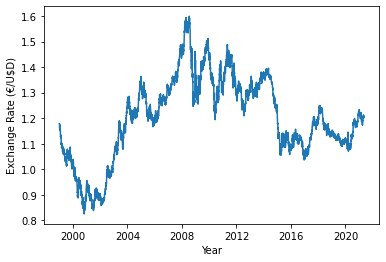

In [ ]:
import matplotlib.pyplot as plt

plt.plot(euro_to_dollar['Time'], euro_to_dollar['US_dollar'])
plt.xlabel('Year')
plt.ylabel('Exchange Rate (€/U$D)')
plt.show()

Como podemos observar, o gráfico acima apresenta várias oscilações entre, além das variações entre os de 1999 a 2021. Estas oscilações se referem a variação diária da taxa de câmbio. Uma das formas de diminuir a presença destas oscilações no gráfico, é utilizar o conceito de média móvel.

A depender do período de tempo escolhido, a média móvel leva em consideração os valores referentes a um determinado dia e aos dias anteriores. Por exemplo, uma média móvel semanal aborda a média dos valores da taxa de câmbio nos últimos 7 dias.

Explicado o conceito, vamos aplicá-lo para a nossa análise.

In [ ]:
euro_to_dollar['rolling_mean'] = euro_to_dollar['US_dollar'].rolling(30).mean()
euro_to_dollar

,Time,US_dollar,rolling_mean
0,1999-01-04,1.1789,NaN
1,1999-01-05,1.1790,NaN
2,1999-01-06,1.1743,NaN
3,1999-01-07,1.1632,NaN
4,1999-01-08,1.1659,NaN
...,...,...,...
5714,2021-04-30,1.2082,1.192843
5715,2021-05-03,1.2044,1.193283
5716,2021-05-04,1.2021,1.193717
5717,2021-05-05,1.2005,1.193980


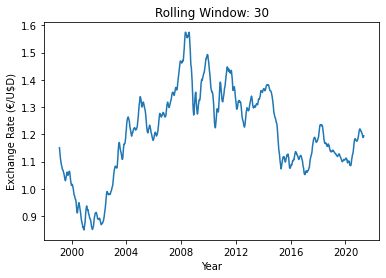

In [ ]:
plt.plot(euro_to_dollar['Time'], euro_to_dollar['rolling_mean'])
plt.title('Rolling Window: 30')
plt.xlabel('Year')
plt.ylabel('Exchange Rate (€/U$D)')
plt.show()

## **Avaliando a Taxa de Câmbio durante a Pandemia**

Para este projeto vamos avaliar como a taxa de câmbio do Euro em relação ao Dólar Americano variou durante o período da pandemia (2020-2021) em comparação aos períodos de 2016 a 2019.

A fim de destacar os valores de taxa de câmbio de 2020 em diante foi necessário criar mais uma coluna referente ao ano e depois um dataframe que reunisse apenas os valores referentes aos anos de 2020 e 2021:

In [ ]:
import datetime as dt

euro_to_dollar_2020 = euro_to_dollar.loc[(euro_to_dollar['Time'] >= dt.datetime(2020,1,1)), :]
euro_to_dollar_2020

,Time,US_dollar,rolling_mean
5375,2020-01-02,1.1193,1.109237
5376,2020-01-03,1.1147,1.109470
5377,2020-01-06,1.1194,1.109920
5378,2020-01-07,1.1172,1.110190
5379,2020-01-08,1.1115,1.110380
...,...,...,...
5714,2021-04-30,1.2082,1.192843
5715,2021-05-03,1.2044,1.193283
5716,2021-05-04,1.2021,1.193717
5717,2021-05-05,1.2005,1.193980


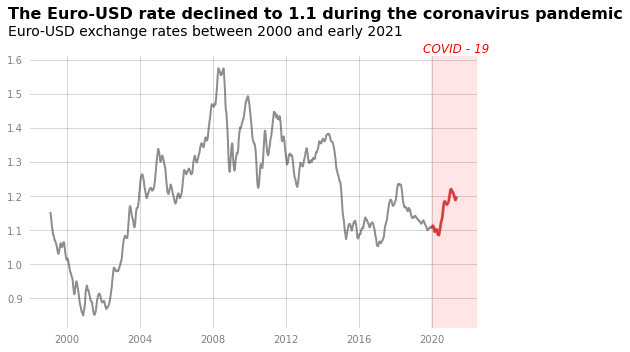

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,5))
ax.plot(euro_to_dollar['Time'], euro_to_dollar['rolling_mean'], color = '#1E1E1D', alpha = 0.5, linewidth = 2)
ax.plot(euro_to_dollar_2020['Time'], euro_to_dollar_2020['rolling_mean'], color = 'red', alpha = 0.5, linewidth = 3)
ax.tick_params(left = False, bottom = False)
ax.tick_params(axis = 'x', colors = 'grey')
ax.tick_params(axis = 'y', colors = 'grey')
ax.grid(color = 'grey', alpha = 0.4)
for location in ['left', 'right','top','bottom']:
  ax.spines[location].set_visible(False)

ax.axvline(dt.datetime(2021,5,6), ymin= 0, ymax=1.55, 
           color = 'red', linewidth =50, alpha = 0.1)
ax.text(dt.datetime(2019,6,30), 1.62, 'COVID - 19', color = 'red', style = 'italic', size = 12)

ax.text(dt.datetime(1996,10,20), 1.72, 'The Euro-USD rate declined to 1.1 during the coronavirus pandemic', size = 16, weight = 'bold')
ax.text(dt.datetime(1996,10,20), 1.67, 'Euro-USD exchange rates between 2000 and early 2021', size = 14)

plt.show()

## **Avaliando a Taxa de Câmbio em Diferentes Governos**

Faremos um gráfico para entender como a taxa de câmbio variou entre os governos de **George W. Bush (2001-2009)**, **Barack Obama (2009-2017)** e **Donald Trump (2017-2021)**.

O primeiro passo é dividir o conjunto de dados por anos de governo.

In [ ]:
euro_dollar_bush = euro_to_dollar.loc[(euro_to_dollar['Time'] >= dt.datetime(2001,1,20)) & (euro_to_dollar['Time'] < dt.datetime(2009,1,30)) , :]
euro_dollar_bush

,Time,US_dollar,rolling_mean
528,2001-01-22,0.9290,0.922910
529,2001-01-23,0.9407,0.924457
530,2001-01-24,0.9294,0.925787
531,2001-01-25,0.9146,0.926927
532,2001-01-26,0.9228,0.928413
...,...,...,...
2575,2009-01-23,1.2795,1.353980
2576,2009-01-26,1.2990,1.354197
2577,2009-01-27,1.3174,1.354060
2578,2009-01-28,1.3260,1.353793


In [ ]:
euro_dollar_obama = euro_to_dollar.loc[(euro_to_dollar['Time'] >= dt.datetime(2009,1,30)) & (euro_to_dollar['Time'] < dt.datetime(2017,1,20)), :]
euro_dollar_obama

,Time,US_dollar,rolling_mean
2580,2009-01-30,1.2816,1.349550
2581,2009-02-02,1.2760,1.345220
2582,2009-02-03,1.2849,1.339330
2583,2009-02-04,1.2818,1.335590
2584,2009-02-05,1.2829,1.331787
...,...,...,...
4619,2017-01-13,1.0661,1.053590
4620,2017-01-16,1.0594,1.053430
4621,2017-01-17,1.0684,1.053370
4622,2017-01-18,1.0664,1.053137


In [ ]:
euro_dollar_trump = euro_to_dollar.loc[(euro_to_dollar['Time'] >= dt.datetime(2017,1,20)) & (euro_to_dollar['Time'] < dt.datetime(2021,1,20)), :]
euro_dollar_trump

,Time,US_dollar,rolling_mean
4624,2017-01-20,1.0632,1.052497
4625,2017-01-23,1.0715,1.053017
4626,2017-01-24,1.0748,1.053523
4627,2017-01-25,1.0743,1.053967
4628,2017-01-26,1.0700,1.054153
...,...,...,...
5639,2021-01-13,1.2166,1.218850
5640,2021-01-14,1.2124,1.219370
5641,2021-01-15,1.2123,1.219560
5642,2021-01-18,1.2064,1.219270


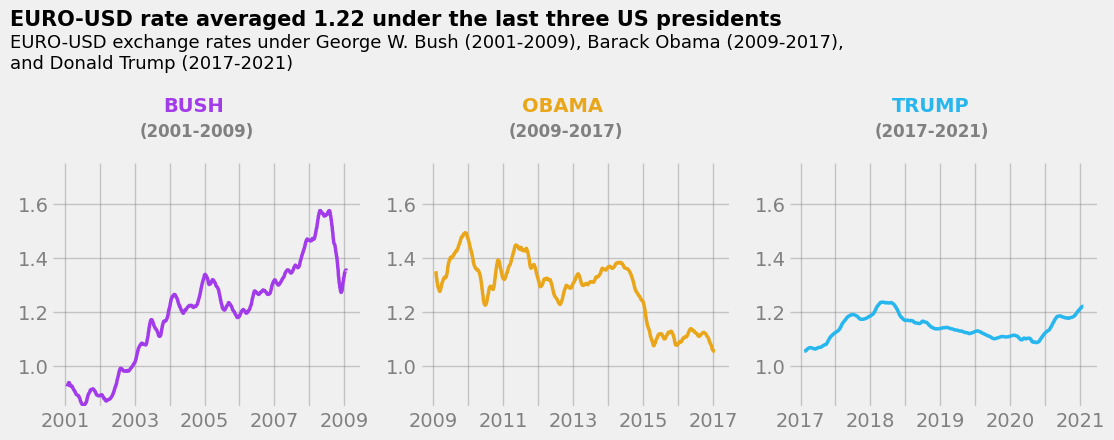

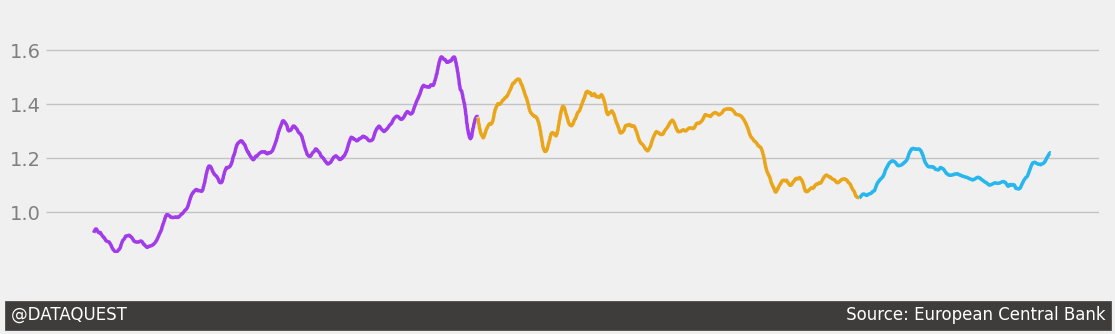

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.style as style
import datetime as dt

style.use('fivethirtyeight')
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize = (12,3))
fig, ax4 = plt.subplots(figsize = (12.1,3))

ax1.plot(euro_dollar_bush['Time'], euro_dollar_bush['rolling_mean'], color = '#A23CEA', linewidth = 2.5)
ax2.plot(euro_dollar_obama['Time'], euro_dollar_obama['rolling_mean'], color = '#EAA61A', linewidth = 2.5)
ax3.plot(euro_dollar_trump['Time'], euro_dollar_trump['rolling_mean'], color = '#27B7EE', linewidth = 2.5)

ax4.plot(euro_dollar_bush['Time'], euro_dollar_bush['rolling_mean'], color = '#A23CEA', linewidth = 2.5)
ax4.plot(euro_dollar_obama['Time'], euro_dollar_obama['rolling_mean'], color = '#EAA61A', linewidth = 2.5)
ax4.plot(euro_dollar_trump['Time'], euro_dollar_trump['rolling_mean'], color = '#27B7EE', linewidth = 2.5)

for ax in [ax1, ax2, ax3, ax4]:
  ax.set_ylim(0.85,1.75)

ax1.set_xticklabels(['','2001','','2003','','2005','','2007','','2009'], color = 'grey')
ax2.set_xticklabels(['','2009','','2011','','2013','','2015','','2017'], color = 'grey')
ax3.set_xticklabels(['2017','','2018','','2019','','2020','','2021'], color = 'grey')
ax4.set_xticklabels([])

for ax in [ax1, ax2, ax3, ax4]:
  ax.tick_params(left = False, bottom = False)
  ax.grid(color = 'grey', alpha = 0.4)
  ax.tick_params(axis='y', colors = 'grey')
  for location in ['left','right','bottom','top']:
    ax.spines[location].set_visible(False)
ax4.grid(axis='x')

ax1.text(dt.datetime(2003,2,25), 1.85, '(2001-2009)', color = 'grey', weight = 'bold', size = 12)
ax2.text(dt.datetime(2011,2,25), 1.85, '(2009-2017)', color = 'grey', weight = 'bold', size = 12)
ax3.text(dt.datetime(2018,1,25), 1.85, '(2017-2021)', color = 'grey', weight = 'bold', size = 12)

ax1.text(dt.datetime(2003,10,25), 1.94, 'BUSH', color = '#A23CEA', weight = 'bold', size = 14)
ax2.text(dt.datetime(2011,7,15), 1.94, 'OBAMA', color = '#EAA61A', weight = 'bold', size = 14)
ax3.text(dt.datetime(2018,4,25), 1.94, 'TRUMP', color = '#27B7EE', weight = 'bold', size = 14)

ax4.text(dt.datetime(1999,5,1), 0.6, '@DATAQUEST' + ' ' * 137 + 'Source: European Central Bank', size = 12, color = 'white', backgroundcolor = '#3F3D3C')

ax1.text(dt.datetime(1999,6,1), 2.26, 'EURO-USD rate averaged 1.22 under the last three US presidents', weight = 'bold', size = 15)
ax1.text(dt.datetime(1999,6,1), 2.10, 'EURO-USD exchange rates under George W. Bush (2001-2009), Barack Obama (2009-2017),\nand Donald Trump (2017-2021)',
         size = 13)

plt.show()